# 한강 
# 1. 한강 유무에 따른 동별 가격비교 -> 구마다 한강 있는 동 없는 있는 동 비교 -> 한강이 있는 동이 더 비싸다
# 2. 그러면 이제 한강이 있는 곳에서의 가격 차이
#    재개발을 했는지 안했는지
#     재개발을 한 아파트와 안한 아파트의 가격 비교
#     ---> 답을 도출 
#     통합해서 상관계수 확인해봤더니
#     가격과 한강의 상관계수 높다


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid") #font_scale = 1.3)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")


# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('data/real_real_train.csv', index_col = [0], encoding = 'euc-kr')
train.tail()

,Unnamed: 0.1,gu,dong,apartment_id,apt,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,hakgun,exclusive_use_area_group,hakgun_rank,year_of_completion_group,pop,gu_area,diff_year,rebuilding,river_re,gu_mean,apt_age_group,dep_shop,강남과의 거리,kangnam,subway_distance,hospital_distance,park_distance,sub_dis_group,hos_dis_group,park_gu_count
742280,742280,중구,흥인동,10228,청계천 두산위브더제니스,207.5717,2014,36,180208,0,2016,5,4,2,2010,134409,9.96,2,0,1,53622,0,3,9.382,7,0.098877,1.234784,0.736297,1,3.0,3
742281,742281,중구,흥인동,10228,청계천 두산위브더제니스,240.5395,2014,21,186091,0,2016,5,4,2,2010,134409,9.96,2,0,1,53622,0,3,9.382,7,0.098877,1.234784,0.736297,1,3.0,3
742282,742282,중구,흥인동,10228,청계천 두산위브더제니스,252.0567,2014,36,209128,0,2016,5,4,2,2010,134409,9.96,2,0,1,53622,0,3,9.382,7,0.098877,1.234784,0.736297,1,3.0,3
742283,742283,중구,흥인동,10228,청계천 두산위브더제니스,260.0287,2014,36,209854,0,2016,5,4,2,2010,134409,9.96,2,0,1,53622,0,3,9.382,7,0.098877,1.234784,0.736297,1,3.0,3
742284,742284,중구,흥인동,10228,청계천 두산위브더제니스,273.9670,2014,28,228977,0,2016,5,4,2,2010,134409,9.96,2,0,1,53622,0,3,9.382,7,0.098877,1.234784,0.736297,1,3.0,3


In [3]:
df_han = train[['gu', 'dong', 'transaction_real_price', 'hanriver', 'rebuilding', 'river_re', 'diff_year']]
df_han

,gu,dong,transaction_real_price,hanriver,rebuilding,river_re,diff_year
0,송파구,가락동,1500,0,0,1,16
1,송파구,가락동,5000,0,0,1,28
2,송파구,가락동,5000,0,1,2,30
3,송파구,가락동,5000,0,1,2,31
4,송파구,가락동,6000,0,1,2,30
...,...,...,...,...,...,...,...
742280,중구,흥인동,180208,0,0,1,2
742281,중구,흥인동,186091,0,0,1,2
742282,중구,흥인동,209128,0,0,1,2
742283,중구,흥인동,209854,0,0,1,2


In [4]:
han_list = list(df_han[df_han['hanriver'] == 1]['gu'].unique())
han_list

['강서구',
 '강동구',
 '광진구',
 '성동구',
 '동작구',
 '영등포구',
 '마포구',
 '서초구',
 '용산구',
 '강남구',
 '은평구',
 '송파구']

#### 한강이 있는 구 : '용산구', '성동구', '광진구', '마포구', '강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구'

In [5]:
# 용산구의 한강이 있는 동과 없는 동의 가격 평균
print(df_han.loc[df_han['gu'] == '용산구'].loc[df_han['hanriver'] == 0]['transaction_real_price'].mean())
print(df_han.loc[df_han['gu'] == '용산구'].loc[df_han['hanriver'] == 1]['transaction_real_price'].mean())
print('')

64050.54487939897
97169.24521487902



In [56]:
for i in han_list:
    print(i)
    print(i, '한강이 없는 동의 평균 가격 :    ' , df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 0]['transaction_real_price'].mean())
    print(i, '한강이 있는 동의 평균 가격 :    ' , df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]['transaction_real_price'].mean())
    print(i, '한강이 있을 때의 가격 상승율 :  ', round((df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]['transaction_real_price'].mean() -  df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 0]['transaction_real_price'].mean()) / df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 0]['transaction_real_price'].mean()*100), '%')
    print(i, '의 평균 가격 :                  ', df_han.loc[df_han['gu'] == i]['transaction_real_price'].mean())
    print(i, '한강이 있는 동의 거래량 :       ', len(df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]))
    print(i, '의 총 거래량 :                  ', len(df_han.loc[df_han['gu'] == i]))
    print(i, '한강이 있는 동의 거래량 비율 :  ', round(len(df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]) / len(df_han.loc[df_han['gu'] == i]) * 100), '%')

    print('')
    

강서구
강서구 한강이 없는 동의 평균 가격 :     39103.19599508832
강서구 한강이 있는 동의 평균 가격 :     34809.53949454033
강서구 한강이 있을 때의 가격 상승율 :   -11 %
강서구 의 평균 가격 :                   36881.131408649686
강서구 한강이 있는 동의 거래량 :        22712
강서구 의 총 거래량 :                   43886
강서구 한강이 있는 동의 거래량 비율 :   52 %

강동구
강동구 한강이 없는 동의 평균 가격 :     45711.2454690548
강동구 한강이 있는 동의 평균 가격 :     47075.82131491638
강동구 한강이 있을 때의 가격 상승율 :   3 %
강동구 의 평균 가격 :                   46180.32238618378
강동구 한강이 있는 동의 거래량 :        14769
강동구 의 총 거래량 :                   42964
강동구 한강이 있는 동의 거래량 비율 :   34 %

광진구
광진구 한강이 없는 동의 평균 가격 :     33051.463450292395
광진구 한강이 있는 동의 평균 가격 :     58985.19113237184
광진구 한강이 있을 때의 가격 상승율 :   78 %
광진구 의 평균 가격 :                   56677.571809548586
광진구 한강이 있는 동의 거래량 :        14006
광진구 의 총 거래량 :                   15374
광진구 한강이 있는 동의 거래량 비율 :   91 %

성동구
성동구 한강이 없는 동의 평균 가격 :     47179.80049261084
성동구 한강이 있는 동의 평균 가격 :     62457.81354727328
성동구 한강이 있을 때의 가격 상승율 :   32 %
성동구 의 평균 가격 :                   52946.757005404994
성동구

In [62]:
for i in train['gu'].unique():
    print(i)
    print(i, '재개발X 아파트의 평균 가격 :    ' , df_han.loc[df_han['gu'] == i].loc[df_han['rebuilding'] == 0]['transaction_real_price'].mean())
    print(i, '재개발O 아파트의 평균 가격 :    ' , df_han.loc[df_han['gu'] == i].loc[df_han['rebuilding'] == 1]['transaction_real_price'].mean())
    print(i, '재개발 했을 때의 가격 상승율 :  ', round((df_han.loc[df_han['gu'] == i].loc[df_han['rebuilding'] == 1]['transaction_real_price'].mean() -  df_han.loc[df_han['gu'] == i].loc[df_han['rebuilding'] == 0]['transaction_real_price'].mean()) / df_han.loc[df_han['gu'] == i].loc[df_han['rebuilding'] == 0]['transaction_real_price'].mean()*100), '%')
    print(i, '의 평균 가격 :                  ', df_han.loc[df_han['gu'] == i]['transaction_real_price'].mean())
    print(i, '재개발 한 아파트 거래량 :       ', len(train.loc[train['rebuilding'] == 1].loc[train['gu'] == i]))
    print(i, '의 총 거래량 :                  ',len(train.loc[train['gu'] == i]))
    print(i, '재개발 한 아파트 거래량 비율 :  ' , round(100 * len(train.loc[train['rebuilding'] == 1].loc[train['gu'] == i]) / len(train.loc[train['gu'] == i])), '%')
    print('')

송파구
송파구 재개발X 아파트의 평균 가격 :     67183.09085868737
송파구 재개발O 아파트의 평균 가격 :     80997.55821352816
송파구 재개발 했을 때의 가격 상승율 :   21 %
송파구 의 평균 가격 :                   69447.39020338787
송파구 재개발 한 아파트 거래량 :        8486
송파구 의 총 거래량 :                   51773
송파구 재개발 한 아파트 거래량 비율 :   16 %

구로구
구로구 재개발X 아파트의 평균 가격 :     33798.99597292914
구로구 재개발O 아파트의 평균 가격 :     26799.070716228467
구로구 재개발 했을 때의 가격 상승율 :   -21 %
구로구 의 평균 가격 :                   33589.535633867774
구로구 재개발 한 아파트 거래량 :        1103
구로구 의 총 거래량 :                   36861
구로구 재개발 한 아파트 거래량 비율 :   3 %

금천구
금천구 재개발X 아파트의 평균 가격 :     28642.458090542357
금천구 재개발O 아파트의 평균 가격 :     23812.207207207208
금천구 재개발 했을 때의 가격 상승율 :   -17 %
금천구 의 평균 가격 :                   28286.29577347837
금천구 재개발 한 아파트 거래량 :        888
금천구 의 총 거래량 :                   12043
금천구 재개발 한 아파트 거래량 비율 :   7 %

강서구
강서구 재개발X 아파트의 평균 가격 :     36942.12018384287
강서구 재개발O 아파트의 평균 가격 :     19448.307189542484
강서구 재개발 했을 때의 가격 상승율 :   -47 %
강서구 의 평균 가격 :                   36881.131408649686
강서구

In [65]:
for i in train['gu'].unique():
    print('--------------------------------------------------------------------------------------------------')
    print(i, '의 서울에서의 거래량 비율 : ', round(100 * len(train.loc[train['gu'] == i]) / len(train)), '%')
    print('')
    for j in np.sort(train['exclusive_use_area_group'].unique()):
        print(i, '아파트 나이 ', j, '의 거래량    : ', len(train.loc[train['gu'] == i].loc[train['exclusive_use_area_group'] == j]))
        print(i, '아파트 나이 ', j, '평균 거래가  : ', train.loc[train['gu'] == i].loc[train['exclusive_use_area_group'] == j]['transaction_real_price'].mean())
        print(i, '아파트 나이 ', j, '의 거래비율  : ', round(100 *len(train.loc[train['gu'] == i].loc[train['exclusive_use_area_group'] == j]) / len(train.loc[train['gu'] == i])), '%')
        print('')

--------------------------------------------------------------------------------------------------
송파구 의 서울에서의 거래량 비율 :  7 %

송파구 아파트 나이  0 의 거래량    :  3129
송파구 아파트 나이  0 평균 거래가  :  32193.86225631192
송파구 아파트 나이  0 의 거래비율  :  6 %

송파구 아파트 나이  1 의 거래량    :  13879
송파구 아파트 나이  1 평균 거래가  :  50799.75740327113
송파구 아파트 나이  1 의 거래비율  :  27 %

송파구 아파트 나이  2 의 거래량    :  24700
송파구 아파트 나이  2 평균 거래가  :  71653.3964777328
송파구 아파트 나이  2 의 거래비율  :  48 %

송파구 아파트 나이  3 의 거래량    :  7039
송파구 아파트 나이  3 평균 거래가  :  93867.08978548089
송파구 아파트 나이  3 의 거래비율  :  14 %

송파구 아파트 나이  4 의 거래량    :  3026
송파구 아파트 나이  4 평균 거래가  :  118686.70423000661
송파구 아파트 나이  4 의 거래비율  :  6 %

--------------------------------------------------------------------------------------------------
구로구 의 서울에서의 거래량 비율 :  5 %

구로구 아파트 나이  0 의 거래량    :  2073
구로구 아파트 나이  0 평균 거래가  :  14970.985045827303
구로구 아파트 나이  0 의 거래비율  :  6 %

구로구 아파트 나이  1 의 거래량    :  13890
구로구 아파트 나이  1 평균 거래가  :  26942.410367170625
구로구 아파트 나이  1 의 거래비율  :  38 %

구로구 아파트 나이 

성동구 아파트 나이  2 의 거래비율  :  47 %

성동구 아파트 나이  3 의 거래량    :  3800
성동구 아파트 나이  3 평균 거래가  :  66982.59657894737
성동구 아파트 나이  3 의 거래비율  :  15 %

성동구 아파트 나이  4 의 거래량    :  524
성동구 아파트 나이  4 평균 거래가  :  163596.27671755725
성동구 아파트 나이  4 의 거래비율  :  2 %

--------------------------------------------------------------------------------------------------
성북구 의 서울에서의 거래량 비율 :  5 %

성북구 아파트 나이  0 의 거래량    :  155
성북구 아파트 나이  0 평균 거래가  :  15134.76129032258
성북구 아파트 나이  0 의 거래비율  :  0 %

성북구 아파트 나이  1 의 거래량    :  15309
성북구 아파트 나이  1 평균 거래가  :  30528.229799464367
성북구 아파트 나이  1 의 거래비율  :  41 %

성북구 아파트 나이  2 의 거래량    :  16014
성북구 아파트 나이  2 평균 거래가  :  40251.18714874485
성북구 아파트 나이  2 의 거래비율  :  43 %

성북구 아파트 나이  3 의 거래량    :  5216
성북구 아파트 나이  3 평균 거래가  :  51032.41219325153
성북구 아파트 나이  3 의 거래비율  :  14 %

성북구 아파트 나이  4 의 거래량    :  434
성북구 아파트 나이  4 평균 거래가  :  72290.89631336405
성북구 아파트 나이  4 의 거래비율  :  1 %

--------------------------------------------------------------------------------------------------
서대문구 의 서울에서

In [39]:
print(i, '한강이 있는 거래량 : ', len(train.loc[train['hanriver'] == 1].loc[train['gu'] == i]))
print(i, '의 총 거래량',len(train.loc[train['gu'] == i]))

15374

# 한강 근처가 많이 오른 구

    용산구   (많이 오름)      52
    성동구   (많이 오름)      32
    광진구   (엄청 많이 오름) 78
    강남구                    16
    영등포구 (엄청 많이 오름) 74
    동작구                    8
    서초구   (많이 오름)      34
    송파구   (많이 오름)      47
    강동구                    3

In [9]:
han_up = ['용산구', '성동구', '광진구', '영등포구', '서초구', '송파구']

# 한강 근처가 오히려 낮은 구

    강서구

In [10]:
han_down = ['강서구']

In [11]:
# 한강O -> 떨어진 구의 평균 아파트나이
for i in han_down:
    print(i, '한강이 없는 동의 평균 아파트 나이 : ', df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 0]['diff_year'].mean())
    print(i, '한강이 있는 동의 평균 아파트 나이 : ', df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]['diff_year'].mean())
    print(i, '의 평균 아파트 나이 : ', df_han.loc[df_han['gu'] == i]['diff_year'].mean())
    print('')

강서구 한강이 없는 동의 평균 아파트 나이 :  10.915462359497496
강서구 한강이 있는 동의 평균 아파트 나이 :  15.555829517435717
강서구 의 평균 아파트 나이 :  13.316957571890809



In [58]:
for i in han_up:
    print(i, '의 한강이 없는 평균 아파트 나이 : ', df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 0]['diff_year'].mean())
    print(i, '의 한강이 있는 평균 아파트 나이 : ', df_han.loc[df_han['gu'] == i].loc[df_han['hanriver'] == 1]['diff_year'].mean())
    print(i, '의 평균 아파트 나이 :             ', df_han.loc[df_han['gu'] == i]['diff_year'].mean())
    print('')

용산구 의 한강이 없는 평균 아파트 나이 :  13.4282325029656
용산구 의 한강이 있는 평균 아파트 나이 :  18.53436860479114
용산구 의 평균 아파트 나이 :              16.60194537972316

성동구 의 한강이 없는 평균 아파트 나이 :  13.068103448275862
성동구 의 한강이 있는 평균 아파트 나이 :  13.681019599878136
성동구 의 평균 아파트 나이 :              13.299459500900833

광진구 의 한강이 없는 평균 아파트 나이 :  13.510233918128655
광진구 의 한강이 있는 평균 아파트 나이 :  15.659217478223619
광진구 의 평균 아파트 나이 :              15.467997918563809

영등포구 의 한강이 없는 평균 아파트 나이 :  15.961636828644501
영등포구 의 한강이 있는 평균 아파트 나이 :  23.9268413247652
영등포구 의 평균 아파트 나이 :              17.478211764705883

서초구 의 한강이 없는 평균 아파트 나이 :  13.954364801047365
서초구 의 한강이 있는 평균 아파트 나이 :  20.71761497458783
서초구 의 평균 아파트 나이 :              16.862556968097866

송파구 의 한강이 없는 평균 아파트 나이 :  18.43079701964326
송파구 의 한강이 있는 평균 아파트 나이 :  15.536783822821377
송파구 의 평균 아파트 나이 :              17.269793135418077



### 영등포구가 한강이 있으면 많이 올랐음 -> 한강 근처가 재개발시기와 비슷 (아마 여의도의 영향)

### 광진구의 한강이 가까운 지역은 강남이나 다름없음

### 강서구   (아마 강남과의 먼 거리)

In [13]:
train.corr()['transaction_real_price']

Unnamed: 0.1               -0.001759
apartment_id               -0.016458
exclusive_use_area          0.668717
year_of_completion         -0.005060
floor                       0.142295
transaction_real_price      1.000000
hanriver                    0.286348
transaction_year            0.115091
hakgun                      0.220111
exclusive_use_area_group    0.603305
hakgun_rank                -0.518919
year_of_completion_group   -0.006486
pop                         0.076535
gu_area                     0.267520
diff_year                   0.041220
rebuilding                  0.239557
river_re                    0.321551
gu_mean                     0.595677
apt_age_group               0.040671
dep_shop                    0.325747
강남과의 거리                    -0.485249
kangnam                    -0.456580
subway_distance            -0.134936
hospital_distance          -0.081973
park_distance               0.063640
sub_dis_group              -0.119735
hos_dis_group              -0.068899
p

In [66]:
train.head()

,Unnamed: 0.1,gu,dong,apartment_id,apt,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,hakgun,exclusive_use_area_group,hakgun_rank,year_of_completion_group,pop,gu_area,diff_year,rebuilding,river_re,gu_mean,apt_age_group,dep_shop,강남과의 거리,kangnam,subway_distance,hospital_distance,park_distance,sub_dis_group,hos_dis_group,park_gu_count
0,0,송파구,가락동,11072,풍림1,80.52,1995,5,1500,0,2011,6,2,3,1990,690466,33.88,16,0,1,69447,10,1,4.354,2,0.208855,0.328274,0.240551,1,1.0,25
1,1,송파구,가락동,7155,시영1,40.09,1980,5,5000,0,2008,6,1,3,1980,676580,33.88,28,0,1,69447,20,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
2,2,송파구,가락동,7155,시영1,40.09,1980,2,5000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
3,3,송파구,가락동,7155,시영1,45.12,1980,1,5000,0,2011,6,1,3,1980,690466,33.88,31,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
4,4,송파구,가락동,7155,시영1,40.09,1980,2,6000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25


In [14]:
train.to_csv('data/real_train.csv', encoding = 'euc-kr')

In [80]:
df = train[['gu', 'kangnam', 'gu_mean']].drop_duplicates().sort_values(by = ['kangnam'], ascending = True)
df

,gu,kangnam,gu_mean
28313,강남구,0,91419
108003,서초구,1,93760
0,송파구,2,69447
61447,광진구,3,56678
85975,성동구,4,52947
17473,용산구,5,84635
18664,강동구,6,46180
107121,중구,7,53622
120034,동대문구,8,37643
114674,동작구,9,50892


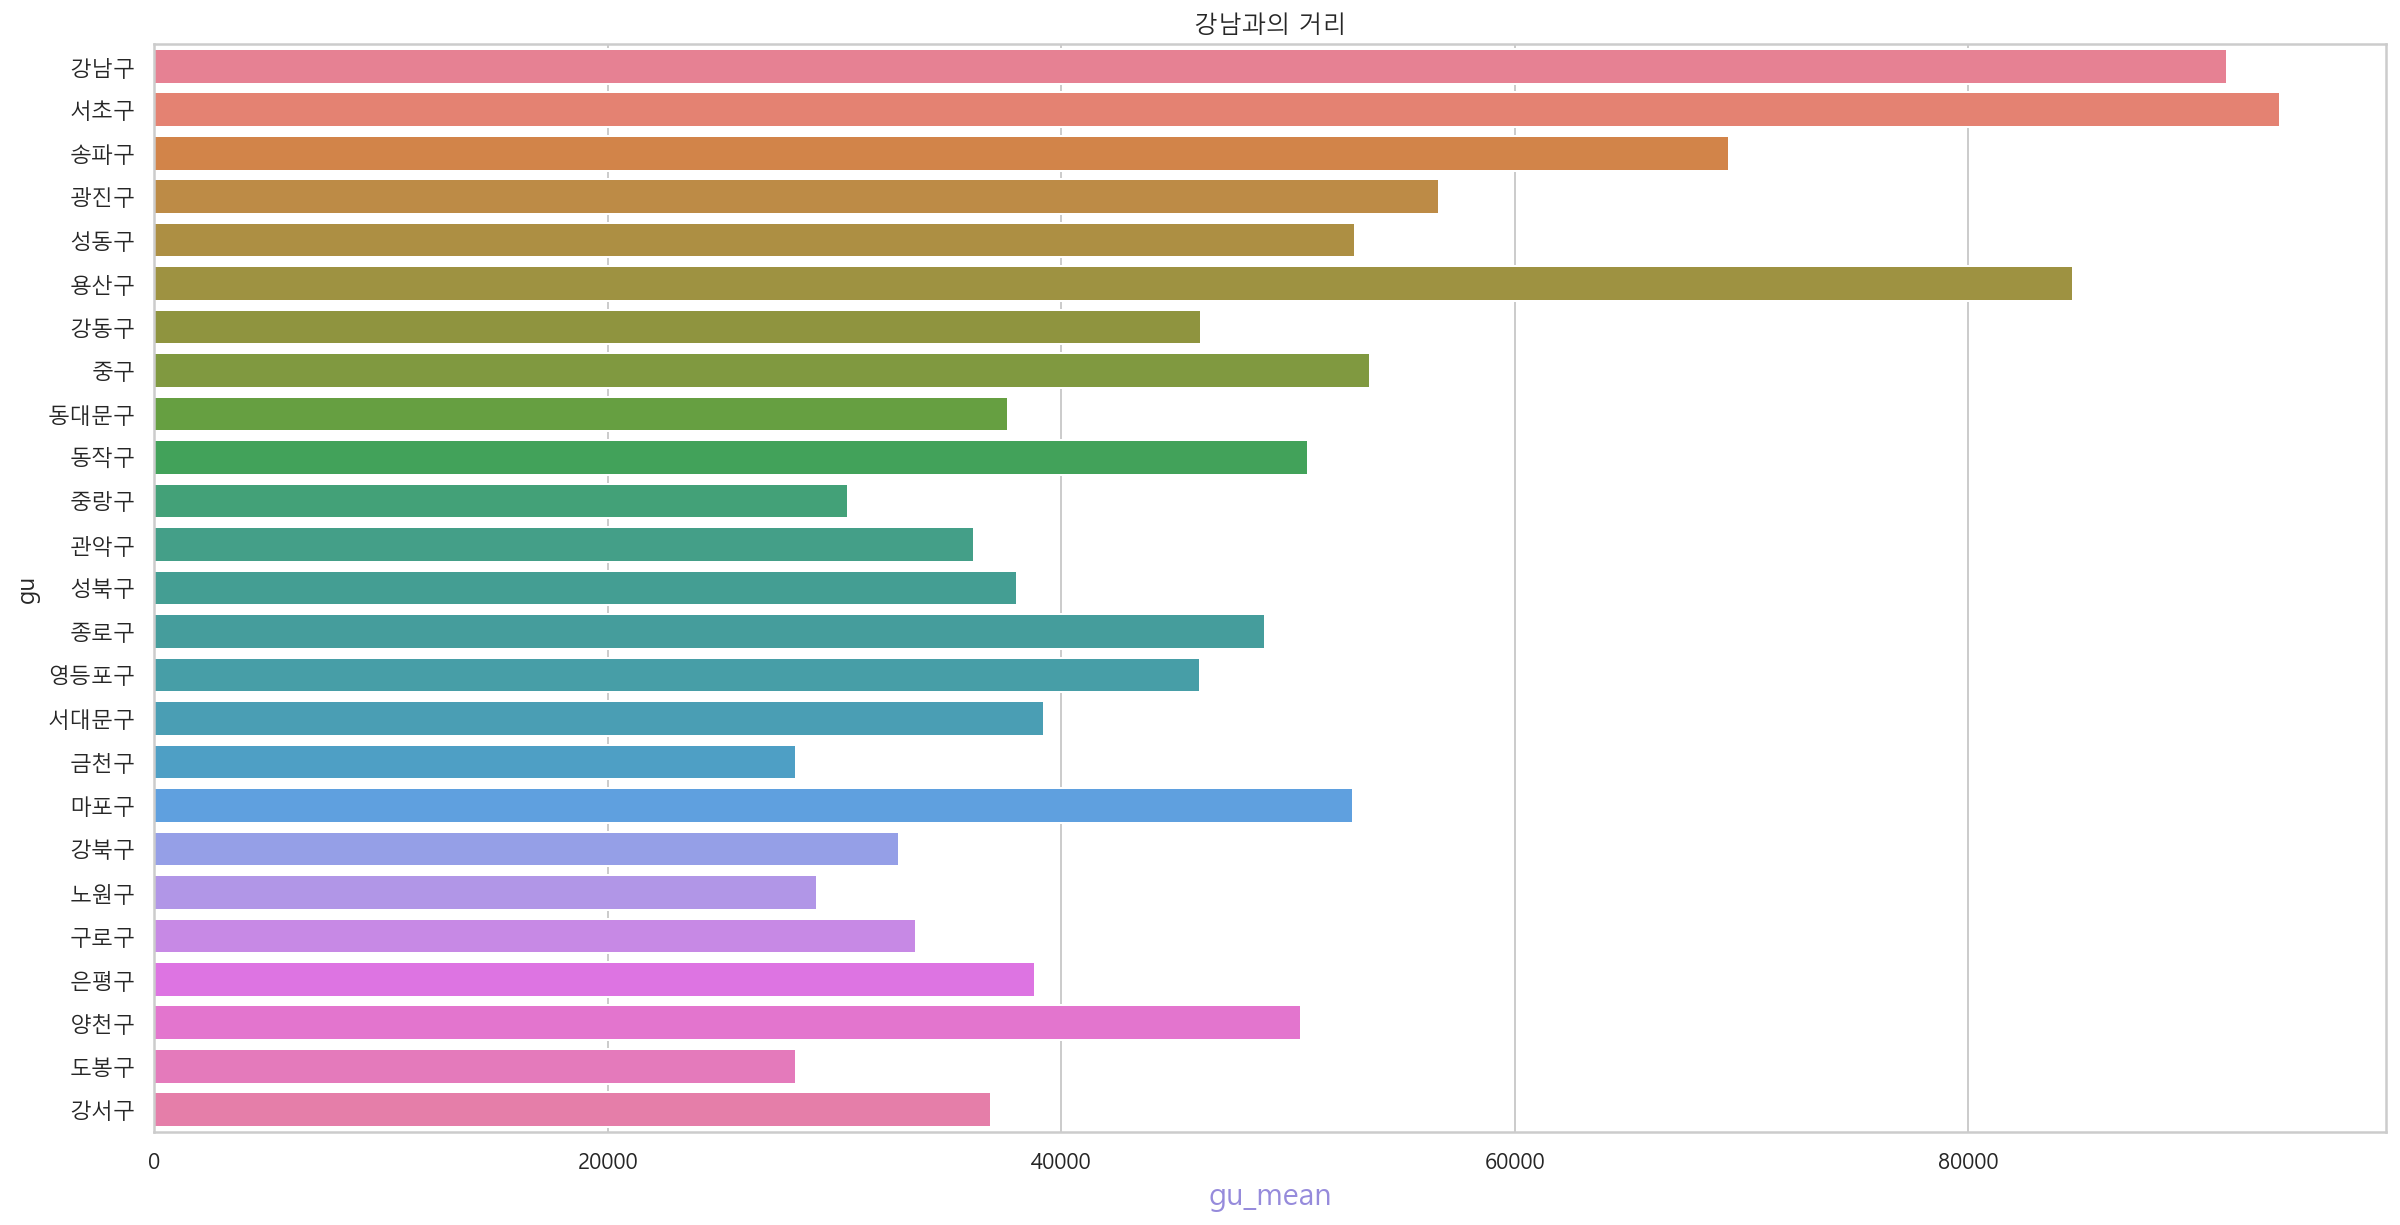

In [93]:
f, ax=plt.subplots(figsize=(20,10))
plt.title('강남과의 거리')
plt.xlabel('구', color='slateblue', size=15, alpha=0.7)

sns.barplot(data = df, x = 'gu_mean', y = df['gu'], palette='husl', ax=ax)

